In [3]:
from PrepareTheData3 import GetTheInput_Single
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import itertools



In [4]:

#***** Get the Values from Pandas *****
df = GetTheInput_Single("filename.csv")
dataset = df.values
X = dataset[:, 0:132]
Y = dataset[:, 132]
#**************************************


#********** Normalize the Input Values ************
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#**************************************************


#********** Cut Values to 3 piecies ************
#Normalized
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
#Raw
X_train_Raw, X_val_and_test_Raw, Y_train_Raw, Y_val_and_test_Raw = train_test_split(X, Y, test_size=0.3)
X_val_Raw, X_test_Raw, Y_val_Raw, Y_test_Raw = train_test_split(X_val_and_test_Raw, Y_val_and_test_Raw, test_size=0.5)
#print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
#***********************************************



In [24]:


#********** Build the Model and Compile ************
model = Sequential()
model.add(Dense(128, input_dim=132, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#***************************************************


#********** Train the Model ********************
hist = model.fit(X_train, Y_train,batch_size=2048, epochs=15,validation_data=(X_val, Y_val))
#***********************************************


#********** Test the Model on New Data ********************
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)
#*********************************************************


#********** Perform predictions on new Dataset ********************
predictions = model.predict(X_test)
#******************************************************************



Train on 609630 samples, validate on 130635 samples
Epoch 1/15
609630/609630 [==============================] - 3s 5us/step - loss: 0.6883 - acc: 0.5443 - val_loss: 0.6841 - val_acc: 0.5541
Epoch 2/15
609630/609630 [==============================] - 4s 6us/step - loss: 0.6814 - acc: 0.5594 - val_loss: 0.6790 - val_acc: 0.5622
Epoch 3/15
609630/609630 [==============================] - 3s 4us/step - loss: 0.6766 - acc: 0.5700 - val_loss: 0.6777 - val_acc: 0.5654
Epoch 4/15
609630/609630 [==============================] - 3s 4us/step - loss: 0.6723 - acc: 0.5799 - val_loss: 0.6690 - val_acc: 0.5864
Epoch 5/15
609630/609630 [==============================] - 3s 5us/step - loss: 0.6700 - acc: 0.5847 - val_loss: 0.6708 - val_acc: 0.5777
Epoch 6/15
609630/609630 [==============================] - 3s 5us/step - loss: 0.6679 - acc: 0.5893 - val_loss: 0.6651 - val_acc: 0.5949
Epoch 7/15
609630/609630 [==============================] - 3s 4us/step - loss: 0.6669 - acc: 0.5918 - val_loss: 0.6644 

In [25]:


#********** Calculate the Stats ********************
# 1.Define stats variables
TotalTrades = 0
GoodTrades = 0
counter = 0
WeekDayStats = {'Monday':[0,0],'Tuesday':[0,0],'Wendsday':[0,0],'Thursday':[0,0],'Friday':[0,0]}
ConsequtiveStats = []

PredictedResults = []

LastWon = False
Weekdays = round(len(predictions)/7200,0)


# 2.Loop through predictions
for prediction_check in predictions:
    if prediction_check > 0.80 or prediction_check < 0.20:
        # Predictions above threshold

        TotalTrades = TotalTrades+1
        Map_Raw_Data = X_test_Raw[counter]
        
     
        
        # Check if won or lost
        WonLost_WeekDay_Coutner = 0
        if np.argmax(predictions[counter]) == Y_test[counter]:
            # Won
            GoodTrades = GoodTrades + 1
            WonLost_WeekDay_Coutner = 0
            ConsequtiveStats.append(1)
            
        else:
            WonLost_WeekDay_Coutner = 1
            ConsequtiveStats.append(0)
            
            
        if Map_Raw_Data[3] == 0: WeekDayStats['Monday'][WonLost_WeekDay_Coutner] = WeekDayStats['Monday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 0.25: WeekDayStats['Tuesday'][WonLost_WeekDay_Coutner] = WeekDayStats['Tuesday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 0.5: WeekDayStats['Wendsday'][WonLost_WeekDay_Coutner] = WeekDayStats['Wendsday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 0.75: WeekDayStats['Thursday'][WonLost_WeekDay_Coutner] = WeekDayStats['Thursday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 1: WeekDayStats['Friday'][WonLost_WeekDay_Coutner] = WeekDayStats['Friday'][WonLost_WeekDay_Coutner] + 1
        
            
            
            
    counter = counter + 1

# 3. Append stats variables

z = [(x[0], len(list(x[1]))) for x in itertools.groupby(ConsequtiveStats)]    

MaxLost = 0
MaxWon = 0

for a in z:
    if a[0]==0:
        if a[1] > MaxLost: MaxLost = a[1]
    else:
        if a[1] > MaxWon: MaxWon = a[1]



#Get average trades per week
for key, value in WeekDayStats.items():
    value[0] = round(value[0]/Weekdays,0)
    value[1] = round(value[1]/Weekdays,0)

print ('Trades: ' + str(TotalTrades) + ' -- ' + 'Good trades: ' + str(GoodTrades) + ' -- ' + 'Percantage: ' + str(round(((GoodTrades/TotalTrades)*100),2))+ '%')


#******************************************************************





Trades: 4008 -- Good trades: 3164 -- Percantage: 78.94%


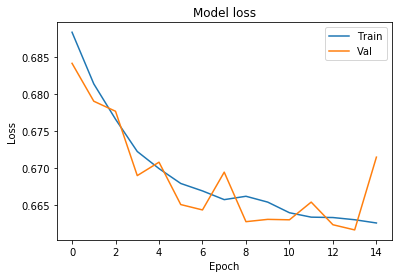

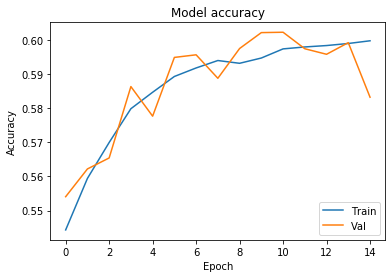

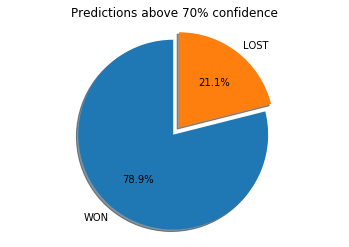

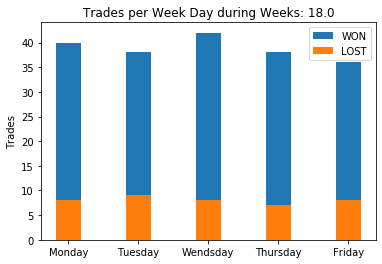

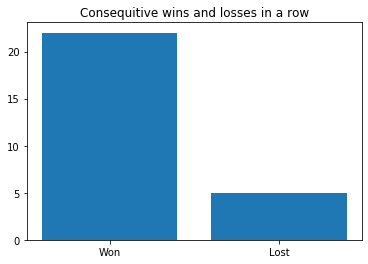

In [26]:



#********** Create the Charts Dashboard ********************

# Chart 1 - Model Loss
#plt.subplot(331)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# Chart 2 - Model Accuracy
#plt.subplot(332)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


# Chart 3 - Lost and Won trades % above 70%
#plt.subplot(333)
labels = 'WON', 'LOST'
sizes = [GoodTrades, (TotalTrades-GoodTrades)]
explode = (0, 0.1)  
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Predictions above 70% confidence')
plt.show()


# Chart 4 - Average Tr
#********** Test the Model on New Data ********************
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)
#*********************************************************
ades per week day

#plt.subplot(334)
N = 5
TradesWonWeekDay = (WeekDayStats['Monday'][0]+WeekDayStats['Monday'][1], 
                    WeekDayStats['Tuesday'][0]+WeekDayStats['Tuesday'][1],
                    WeekDayStats['Wendsday'][0]+WeekDayStats['Wendsday'][1], 
                    WeekDayStats['Thursday'][0]+WeekDayStats['Thursday'][1], 
                    WeekDayStats['Friday'][0]+WeekDayStats['Friday'][1])
TradesLostWeekDay = (WeekDayStats['Monday'][1], WeekDayStats['Tuesday'][1], WeekDayStats['Wendsday'][1], WeekDayStats['Thursday'][1], WeekDayStats['Friday'][1])



ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, TradesWonWeekDay, width)
p2 = plt.bar(ind, TradesLostWeekDay, width)

plt.ylabel('Trades')
plt.title('Trades per Week Day during Weeks: ' + str(Weekdays))
plt.xticks(ind, ('Monday', 'Tuesday', 'Wendsday', 'Thursday', 'Friday'))
plt.legend((p1[0], p2[0]), ('WON', 'LOST'))
plt.show()


# Chart 5 - Consequtive Losses and Wins
#plt.subplot(335)
plt.title('Consequitive wins and losses in a row')
x = np.arange(2)
money = [MaxWon,MaxLost]
plt.bar(x, money)
plt.xticks(x, ('Won','Lost'))


#**************************************
plt.show()
#******************************************************************


In [34]:
#***** Get the Values from Pandas *****
df = GetTheInput_Single("EURUSD_M1_NEW.csv")
dataset = df.values
XX = dataset[:, 0:132]
YY = dataset[:, 132]
#**************************************

In [35]:
df

,BodyPips,WickUpPips,WickDownPips,Day of Week Normal,Hour Normal,Minute Normal,GreenOrRed?,EmaSlow,EmaFast,MACD,...,Day of Week Normal_10,Hour Normal_10,Minute Normal_10,GreenOrRed?_10,EmaSlow_10,EmaFast_10,MACD_10,Ema9_10,RSI_10,output
150,1.2,1.5,1.2,1.00,0.173913,0.508475,1.0,1.113393,1.113672,0.000278,...,0.677966,0.173913,0.677966,1.0,1.113784,1.113894,0.000110,0.000147,67.831824,0.0
151,0.5,0.6,0.8,1.00,0.173913,0.525424,1.0,1.113429,1.113676,0.000247,...,0.694915,0.173913,0.694915,0.0,1.113788,1.113934,0.000146,0.000135,66.992475,1.0
152,0.0,0.4,0.2,1.00,0.173913,0.542373,0.0,1.113467,1.113677,0.000210,...,0.711864,0.173913,0.711864,0.0,1.113782,1.113956,0.000174,0.000127,63.602269,0.0
153,0.3,0.4,0.4,1.00,0.173913,0.559322,1.0,1.113507,1.113692,0.000185,...,0.728814,0.173913,0.728814,0.0,1.113786,1.113968,0.000182,0.000123,54.032092,0.0
154,0.5,0.5,0.5,1.00,0.173913,0.576271,1.0,1.113551,1.113716,0.000165,...,0.745763,0.173913,0.745763,1.0,1.113790,1.113981,0.000191,0.000124,54.598023,1.0
155,0.7,1.0,0.9,1.00,0.173913,0.593220,1.0,1.113597,1.113739,0.000141,...,0.762712,0.173913,0.762712,0.0,1.113798,1.113993,0.000194,0.000130,54.598023,0.0
156,0.5,1.3,0.5,1.00,0.173913,0.610169,1.0,1.113648,1.113766,0.000118,...,0.779661,0.173913,0.779661,0.0,1.113805,1.113997,0.000192,0.000140,54.598023,1.0
157,0.6,0.3,0.1,1.00,0.173913,0.627119,0.0,1.113691,1.113790,0.000099,...,0.796610,0.173913,0.796610,0.0,1.113816,1.113991,0.000175,0.000152,52.190474,0.0
158,1.3,1.3,1.3,1.00,0.173913,0.644068,1.0,1.113735,1.113824,0.000089,...,0.813559,0.173913,0.813559,1.0,1.113831,1.113978,0.000147,0.000163,52.935472,1.0
159,1.1,0.0,0.4,1.00,0.173913,0.661017,0.0,1.113763,1.113856,0.000093,...,0.830508,0.173913,0.830508,0.0,1.113843,1.113973,0.000129,0.000171,52.935472,1.0


In [39]:
#********** Normalize the Input Values ************
min_max_scaler = preprocessing.MinMaxScaler()
XX_scale = min_max_scaler.fit_transform(XX)
#**************************************************

In [40]:
XX

array([[ 1.20000000e+00,  1.50000000e+00,  1.20000000e+00, ...,
         1.10075047e-04,  1.47093721e-04,  6.78318238e+01],
       [ 5.00000000e-01,  6.00000000e-01,  8.00000000e-01, ...,
         1.46024422e-04,  1.34568591e-04,  6.69924752e+01],
       [ 0.00000000e+00,  4.00000000e-01,  2.00000000e-01, ...,
         1.74136460e-04,  1.27254360e-04,  6.36022689e+01],
       ...,
       [ 1.80000000e+00,  1.80000000e+00,  1.80000000e+00, ...,
        -1.85634381e-04,  9.20135705e-06,  3.51451805e+01],
       [ 2.00000000e-01,  0.00000000e+00,  7.00000000e-01, ...,
        -1.88782059e-04, -2.64134597e-05,  3.81122504e+01],
       [ 4.00000000e-01,  8.00000000e-01,  5.00000000e-01, ...,
        -2.33179771e-04, -6.35864400e-05,  4.05529766e+01]])

In [41]:
YY

array([0., 1., 0., ..., 1., 1., 1.])

In [42]:

#********** Test the Model on New Data ********************
test_loss, test_acc = model.evaluate(XX, YY)
print('Test accuracy:', test_acc)
#*********************************************************

#********** Perform predictions on new Dataset ********************
predictions = model.predict(XX_scale)
#******************************************************************

predictions
len(predictions)

44145/44145 [==============================] - 1s 34us/step
Test accuracy: 0.5606977007683143


44145

In [43]:
predictions.tolist()

[[0.7577157616615295],
 [0.7567341327667236],
 [0.7507969737052917],
 [0.7506053447723389],
 [0.7446023225784302],
 [0.748706042766571],
 [0.7413796186447144],
 [0.7417916059494019],
 [0.7370144128799438],
 [0.742182195186615],
 [0.7412306070327759],
 [0.741834282875061],
 [0.7377901077270508],
 [0.7417765259742737],
 [0.7396945357322693],
 [0.7455306649208069],
 [0.7431687116622925],
 [0.7454173564910889],
 [0.7439122200012207],
 [0.7480278015136719],
 [0.7392306923866272],
 [0.7369925379753113],
 [0.7341406345367432],
 [0.735988199710846],
 [0.7239134907722473],
 [0.7265969514846802],
 [0.7159271240234375],
 [0.7099688649177551],
 [0.7082899808883667],
 [0.6957250237464905],
 [0.6931604146957397],
 [0.6913962364196777],
 [0.6937456130981445],
 [0.6958357095718384],
 [0.6982271075248718],
 [0.6977184414863586],
 [0.6959586143493652],
 [0.7035597562789917],
 [0.698919415473938],
 [0.7048725485801697],
 [0.7039726972579956],
 [0.7034724354743958],
 [0.708346962928772],
 [0.7071242332458

In [44]:

#********** Calculate the Stats ********************
# 1.Define stats variables
TotalTrades = 0
GoodTrades = 0
counter = 0
WeekDayStats = {'Monday':[0,0],'Tuesday':[0,0],'Wendsday':[0,0],'Thursday':[0,0],'Friday':[0,0]}
ConsequtiveStats = []

PredictedResults = []

LastWon = False
Weekdays = round(len(predictions)/7200,0)


# 2.Loop through predictions
for prediction_check in predictions:
    if prediction_check > 0.90 or prediction_check < 0.20:
        # Predictions above threshold

        TotalTrades = TotalTrades+1
        Map_Raw_Data = XX[counter]
        
     
        
        # Check if won or lost
        WonLost_WeekDay_Coutner = 0
        if np.argmax(predictions[counter]) == YY[counter]:
            # Won
            GoodTrades = GoodTrades + 1
            WonLost_WeekDay_Coutner = 0
            ConsequtiveStats.append(1)
            
        else:
            WonLost_WeekDay_Coutner = 1
            ConsequtiveStats.append(0)
            
            
        if Map_Raw_Data[3] == 0: WeekDayStats['Monday'][WonLost_WeekDay_Coutner] = WeekDayStats['Monday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 0.25: WeekDayStats['Tuesday'][WonLost_WeekDay_Coutner] = WeekDayStats['Tuesday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 0.5: WeekDayStats['Wendsday'][WonLost_WeekDay_Coutner] = WeekDayStats['Wendsday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 0.75: WeekDayStats['Thursday'][WonLost_WeekDay_Coutner] = WeekDayStats['Thursday'][WonLost_WeekDay_Coutner] + 1
        if Map_Raw_Data[3] == 1: WeekDayStats['Friday'][WonLost_WeekDay_Coutner] = WeekDayStats['Friday'][WonLost_WeekDay_Coutner] + 1
        
            
            
            
    counter = counter + 1

# 3. Append stats variables

z = [(x[0], len(list(x[1]))) for x in itertools.groupby(ConsequtiveStats)]    

MaxLost = 0
MaxWon = 0

for a in z:
    if a[0]==0:
        if a[1] > MaxLost: MaxLost = a[1]
    else:
        if a[1] > MaxWon: MaxWon = a[1]



#Get average trades per week
for key, value in WeekDayStats.items():
    value[0] = round(value[0]/Weekdays,0)
    value[1] = round(value[1]/Weekdays,0)

print ('Trades: ' + str(TotalTrades) + ' -- ' + 'Good trades: ' + str(GoodTrades) + ' -- ' + 'Percantage: ' + str(round(((GoodTrades/TotalTrades)*100),2))+ '%')


#******************************************************************


Trades: 25 -- Good trades: 21 -- Percantage: 84.0%
